In [41]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [42]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# import matplotlib as mpl
# mpl.use('Agg')

import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

In [65]:
path = 'einstein_full_dataset_covid/'

In [66]:
einstein_exames = pd.read_csv(path+'einstein_full_dataset_exames.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")
einstein_paciente = pd.read_csv(path+'einstein_full_dataset_paciente.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")

In [67]:
# einstein_exames['dt_coleta'] = pd.to_datetime(einstein_exames['dt_coleta'], format="%d/%m/%Y")

In [68]:
einstein_exames = einstein_exames.sort_values(['dt_coleta'])

In [69]:
# print(einstein_exames.head().iloc[0]['dt_coleta'], einstein_exames.tail().iloc[4]['dt_coleta'] )

In [70]:
einstein_exames.tail()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
1517033,5c2face123c2e8dd939e2639068db384c7cda857,31/05/2020,HOSP,Hemograma Contagem Auto,Basófilos #,18,µL,0 a 100
634370,2b325fa8635ebd7ca25db19c5945503993c37ed9,31/05/2020,HOSP,Diferencial Manual,Bastonestes,6.0,%,NaN
1431406,d0f2f007e256fc321b0b0383e665684d26be6f4a,31/05/2020,HOSP,Hemograma com Plaquetas,Volume Médio Plaquetário,12.6,fL,6.5 a 15.0
1139958,7ec393f4662f6020c36afbd6591f3e9944029408,31/05/2020,HOSP,Hemograma Contagem Auto,Eosinófilos #,160,µL,50 a 500
567399,c8fd40ff4207e8d52319999cb9088e90dd615ec3,31/05/2020,HOSP,Gasometria Venosa,BE (gasometria venosa),0.9,mEq/L,-4.0 a 4.0


In [71]:
einstein_paciente.head()

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
0,1e5b27a1ca443075160da7be8a93f977038f277a,M,1978,BR,SP,SAO PAULO,CCCC
1,17435b27462b2e3824596f0b72c9646e15fba829,M,1982,BR,SP,MMMM,CCCC
2,8b09117dc5e21e8b790296a8a4f5aa599ffe6eb8,F,1988,BR,SP,BARUERI,CCCC
3,0c275fa49e292b2f9a9bf9f7cbd83d1351fdd80f,M,1985,BR,SP,SAO PAULO,CCCC
4,b08928a65064fb16e2b2ce347949a485fc52cd75,M,1973,BR,SP,SAO PAULO,CCCC


In [72]:
einstein_exames.shape

(1853695, 8)

In [73]:
einstein_exames.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,1853695,1853695,1853695,1853512,1853695,1853695,1502471,1454886
unique,43561,176,1,61,127,24816,18,298
top,824c0a550406da44fe093b3ac0fe7ee3cf57d41f,29/05/2020,HOSP,Hemograma com Plaquetas,Resultado COVID-19:,Não detectado,%,Não detectado
freq,6874,22650,1853695,453929,56843,116270,370851,131424


In [74]:
einstein_exames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853695 entries, 1645282 to 567399
Data columns (total 8 columns):
id_paciente            object
dt_coleta              object
de_origem              object
de_exame               object
de_analito             object
de_resultado           object
cd_unidade             object
de_valor_referencia    object
dtypes: object(8)
memory usage: 127.3+ MB


In [75]:
einstein_paciente.describe()

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
count,43562,43562,43562,43562,43562,43562,43562
unique,43561,2,91,2,25,22,52
top,608a243b94bd23c95773a1d30b2faabcaefe4ee5,F,1982,BR,SP,SAO PAULO,CCCC
freq,2,22906,1453,42004,43112,33054,40240


In [76]:
einstein_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43562 entries, 0 to 43561
Data columns (total 7 columns):
id_paciente      43562 non-null object
ic_sexo          43562 non-null object
aa_nascimento    43562 non-null object
cd_pais          43562 non-null object
cd_uf            43562 non-null object
cd_municipio     43562 non-null object
cd_cep           43562 non-null object
dtypes: object(7)
memory usage: 2.3+ MB


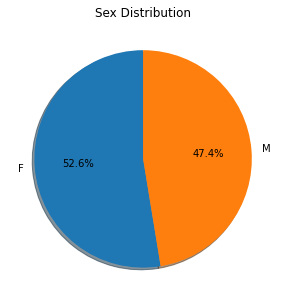

In [77]:
fig = plt.figure(figsize=[20,5])
s = einstein_paciente['ic_sexo'].value_counts().sort_index()
plt.pie( s.get_values(), labels=s.index, autopct='%1.1f%%',shadow=True, startangle=90 )
plt.title('Sex Distribution')
plt.show()

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


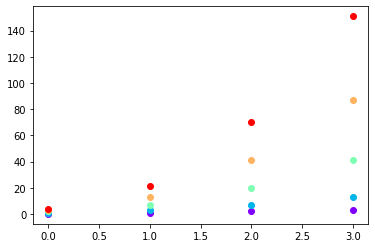

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = np.arange(4)
ys = [i+x+(i*x)**2 for i in range(5)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
print(colors)
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)

In [133]:
# fig = plt.figure(figsize=[20,5])
# s = 2020 - einstein_paciente[einstein_paciente['aa_nascimento']!= 'AAAA']['aa_nascimento'].astype('int')
# values = s.get_values()

# under_5 = []
# for i in values:
#     if i < 5:
#         under_5.append(i)
# bet_5_14 = []
# for i in values:
#     if 4 < i < 15:
#         bet_5_14.append(i)
# bet_15_24 = []
# for i in values:
#     if 14 < i < 25:
#         bet_15_24.append(i)
# bet_25_64 = []
# for i in values:
#     if 24 < i < 65:
#         bet_25_64.append(i)
# above_65 = []
# for i in values:
#     if 64 < i:
#         above_65.append(i)

# plt.hist(under_5  , color=colors[0], bins = 5, width=0.5, label ='X < 5' )
# plt.hist(bet_5_14 , color=colors[1], bins = 10, width=0.5 , label='5 <= X <= 14')
# plt.hist(bet_15_24, color=colors[2], bins = 10, width=0.5 , label='15 <= X <= 24' )
# plt.hist(bet_25_64, color=colors[3], bins = 40, width=0.5 , label='25 <= X <= 64' )
# plt.hist(above_65 , color=colors[4], bins = 25, width=0.5 , label='65 <= X' )
# plt.legend()
# # plt.hist(values, bins=90, width=0.5, color='g')
# plt.show()

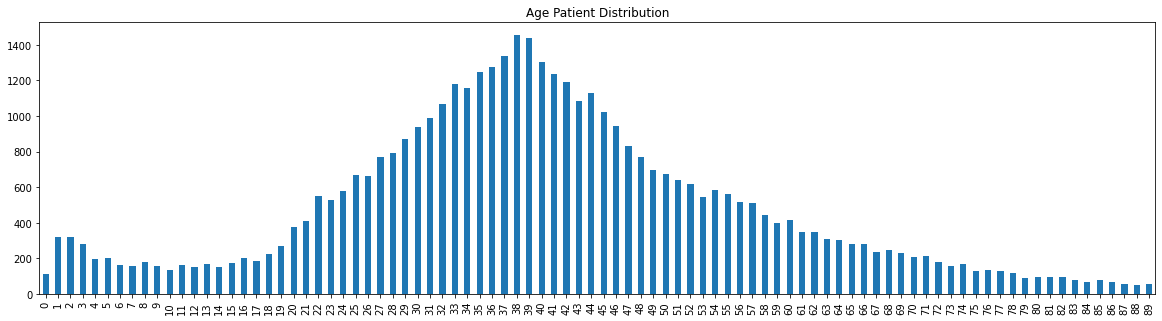

In [78]:
fig = plt.figure(figsize=[20,5])
s = 2020 - einstein_paciente[einstein_paciente['aa_nascimento']!= 'AAAA']['aa_nascimento'].astype('int')
s = s.value_counts().sort_index()
s.plot.bar()
plt.title('Age Patient Distribution')
plt.show()

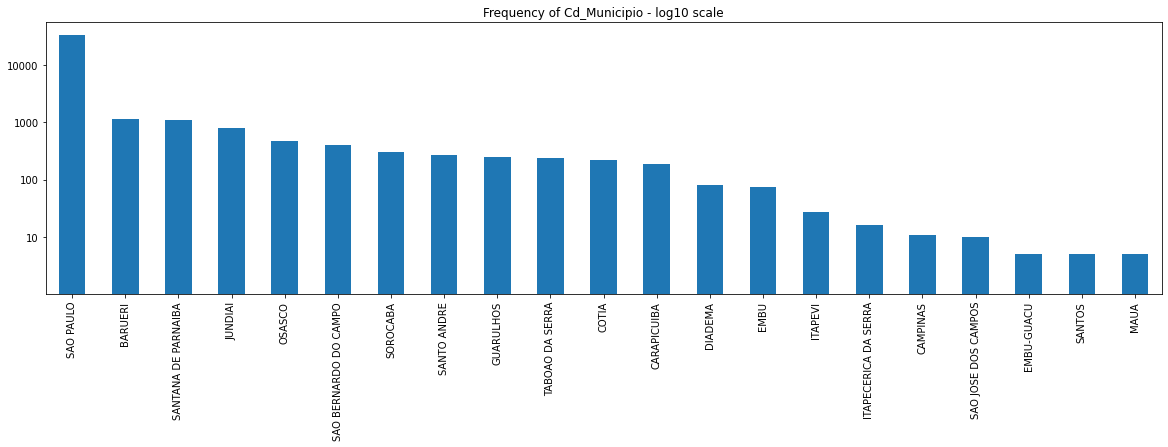

In [79]:
fig = plt.figure(figsize=[20,5])
s = np.log10(einstein_paciente[einstein_paciente['cd_municipio'] != "MMMM"]['cd_municipio'].value_counts())
s.plot.bar()
plt.title('Frequency of Cd_Municipio - log10 scale')
plt.yticks([1,2,3,4],[10,100,1000,10000])
plt.xticks(rotation=90)
# plt.grid()
plt.show()

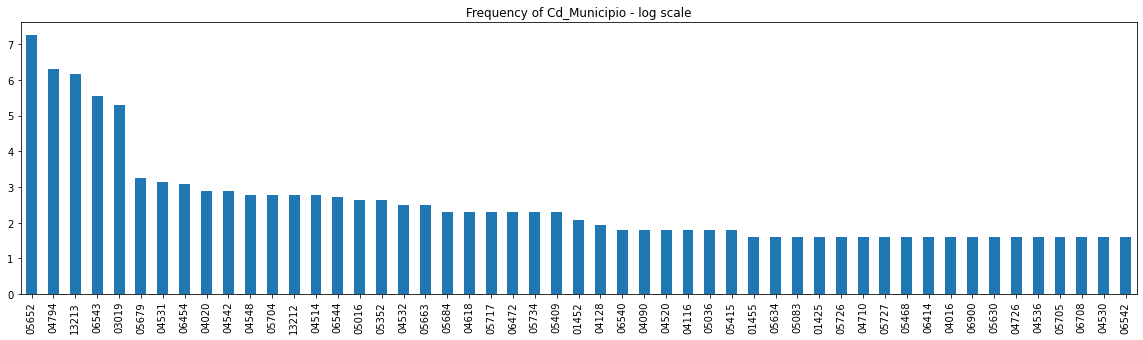

In [80]:
fig = plt.figure(figsize=[20,5])
s = np.log(einstein_paciente[einstein_paciente['cd_cep'] != "CCCC"]['cd_cep'].value_counts())
s.plot.bar()
plt.title('Frequency of Cd_Municipio - log scale')
plt.xticks(rotation=90)
plt.show()

In [81]:
cep = pd.read_csv('ceps.txt', delimiter=';', error_bad_lines=False, encoding="utf-8", dtype = {"cep" : "str"})

b'Skipping line 512331: expected 5 fields, saw 7\n'


In [82]:
cep_sp = cep[ cep['estado'].str[::-1].str[0:2] == 'PS' ]
cep_sp.head()

,cep,estado,cidade,endereco,extensao
0,01001000,São Paulo/SP,Sé,Praça da Sé - lado ímpar,NaN
1,01001001,São Paulo/SP,Sé,Praça da Sé - lado par,NaN
2,01001010,São Paulo/SP,Sé,Rua Filipe de Oliveira,NaN
3,01001900,São Paulo/SP,Sé,"Praça da Sé, 108",UNESP - Universidade Estadual Júlio de Mesqui...
4,01001901,São Paulo/SP,Sé,"Praça da Sé, 371",Edifício Santa Lídia


In [83]:
cep_sp[cep_sp['cep'].astype('str').str.contains('03019')].head()

,cep,estado,cidade,endereco,extensao
13127,03019000,São Paulo/SP,Brás,Rua Joaquim Carlos,NaN
13128,03019005,São Paulo/SP,Brás,Viela Adriano Ruiz,NaN
13129,03019007,São Paulo/SP,Brás,Vila Califórnia,NaN
13130,03019010,São Paulo/SP,Brás,Rua Júlio César da Silva,NaN
13131,03019020,São Paulo/SP,Brás,Rua José Kauer,NaN


In [84]:
cep_to_search= einstein_paciente[einstein_paciente['cd_cep'] != "CCCC"]['cd_cep'].value_counts().index
cep_to_search

Index(['05652', '04794', '13213', '06543', '03019', '05679', '04531', '06454',
       '04020', '04542', '04548', '05704', '13212', '04514', '06544', '05016',
       '05352', '04532', '05663', '05684', '04618', '05717', '06472', '05734',
       '05409', '01452', '04128', '06540', '04090', '04520', '04116', '05036',
       '05415', '01455', '05634', '05083', '01425', '05726', '04710', '05727',
       '05468', '06414', '04016', '06900', '05630', '04726', '04536', '05705',
       '06708', '04530', '06542'],
      dtype='object')

In [85]:
cidades = []
for cep_cid in cep_to_search:
    cid = cep_sp[cep_sp['cep'].astype('str').str.contains(str(cep_cid))]
    print(cid['cidade'].iloc[0], end = ', ')

Jardim Leonor, Vila Gertrudes, Jardim Japão, Cipava, Brás, Jardim Panorama, Itaim Bibi, Alphaville Centro Industrial e Empresarial/Alphaville., Liberdade, Itaim Bibi, Vila Olímpia, Belenzinho, Jardim Japão, Vila Uberabinha, Tamboré, Perdizes, Cidade São Francisco, Itaim Bibi, Paraisópolis, Real Parque, Campo Belo, Vila Andrade, Empresarial 18 do Forte, Parque Reboucas, Vila Guilherme, Jardim Paulistano, Vila Mariana, Cipava, Centro, Vila Uberabinha, Jardim Vila Mariana, Água Branca, Vila Ipojuca, Jardim Europa, Jardim Monte Kemel, Alto da Lapa, Jardim Paulista, Vila Andrade, Santo Amaro, Vila Andrade, Alto da Lapa, Jardim Tupanci, Vila Mariana, Sé, Vila Suzana, Vila Cruzeiro, Jardim Europa, Belenzinho, Tatuapé, Itaim Bibi, Cipava, 

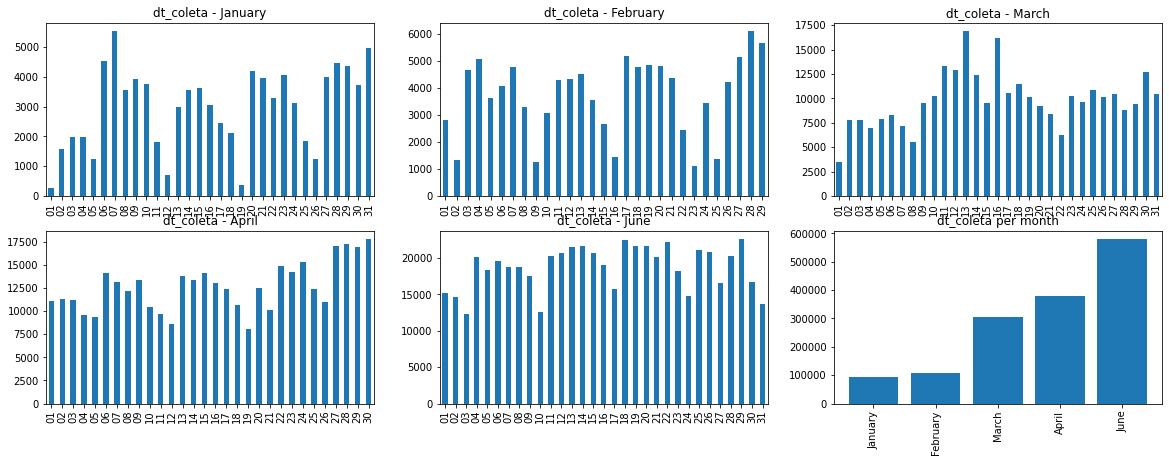

In [86]:
fig = plt.figure(figsize=[20,7])
months = ['January', 'February', 'March', 'April', 'June']
total = []
for i in range(len(months)):
    plt.subplot(2,3,i+1)
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['dt_coleta'].value_counts().sort_index()
    total.append(np.sum(s))
    s.plot.bar()
    idx = list(range(0,len(s.index)))
    plt.xticks(idx, s.index.str[0:2])
    plt.title('dt_coleta - ' + months[i])
    plt.xticks(rotation=90)
# plt.show()

plt.subplot(2,3,6)
idx = list(range(1,len(months)+1))
plt.bar(idx,total)
plt.xticks(idx, months)
plt.title('dt_coleta per month')
plt.xticks(rotation=90)
plt.show()


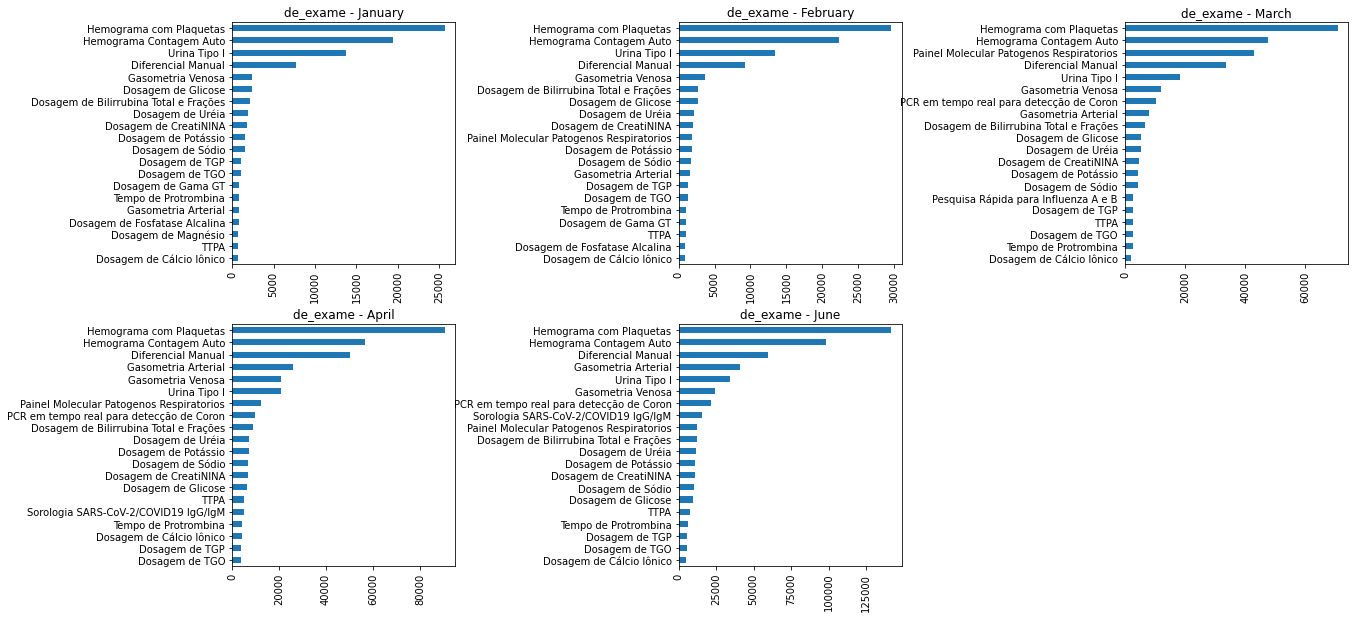

In [87]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=1.0, hspace=0.25)

# fig = plt.figure(figsize=[30,10])
months = ['January', 'February', 'March', 'April', 'June']
total = []
for i in range(len(months)):
#     plt.subplot(2,3,i+1)
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['de_exame'].value_counts()[0:20].sort_values(ascending=True)
    total.append(np.sum(s))
    s.plot.barh()
#     idx = list(range(1,len(s.index)+1))
#     plt.xticks(idx, s.index)
    plt.title('de_exame - ' + months[i])
    plt.xticks(rotation=90)

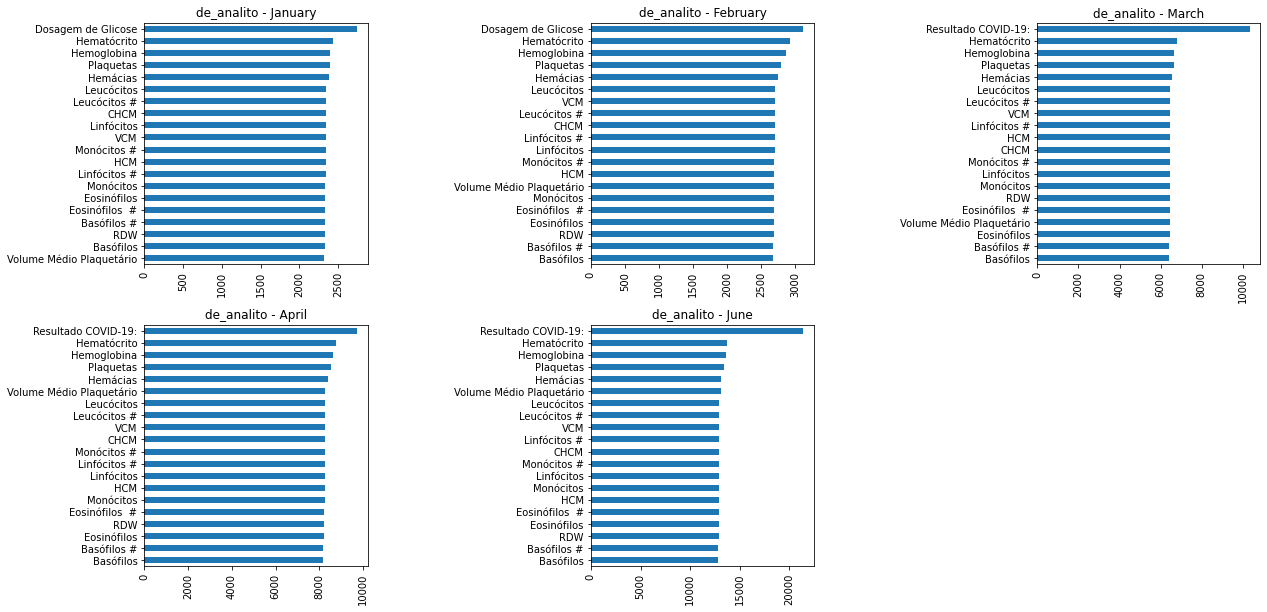

In [88]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=1.0, hspace=0.25)

# fig = plt.figure(figsize=[30,10])
months = ['January', 'February', 'March', 'April', 'June']
total = []
for i in range(len(months)):
#     plt.subplot(2,3,i+1)
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]['de_analito'].value_counts()[0:20].sort_values(ascending=True)
    total.append(np.sum(s))
    s.plot.barh()
#     idx = list(range(1,len(s.index)+1))
#     plt.xticks(idx, s.index)
    plt.title('de_analito - ' + months[i])
    plt.xticks(rotation=90)

In [89]:
analito_resultado = einstein_exames#[['de_exame','de_origem','de_analito','de_resultado']]

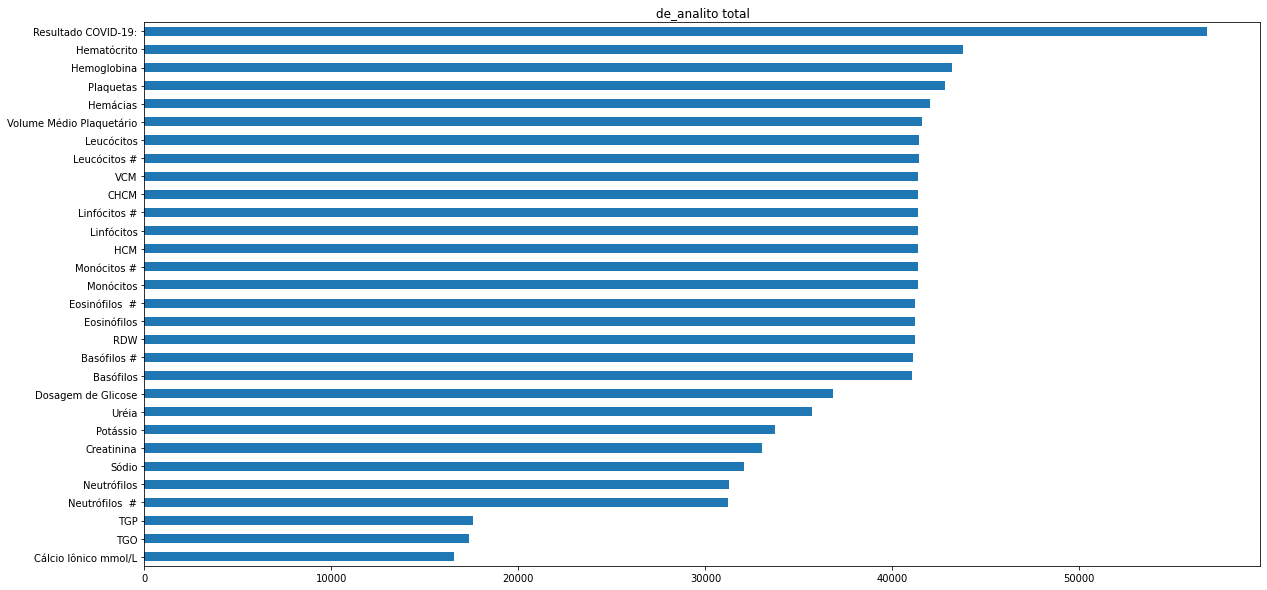

In [91]:
fig = plt.figure(figsize=[20,10])
s = analito_resultado['de_analito'].value_counts()[0:30].sort_values(ascending=True)
analitos_names = s.index
# print(s)
s.plot.barh()
plt.title('de_analito total')
plt.show()

In [92]:
an_res_num = analito_resultado[analito_resultado['de_resultado'].str.contains('[0-9]+.[0-9]+')]
# an_res_num['de_resultado'] = an_res_num['de_resultado'].astype('float')
an_res_num['de_resultado'] = pd.to_numeric(an_res_num['de_resultado'],errors='coerce')

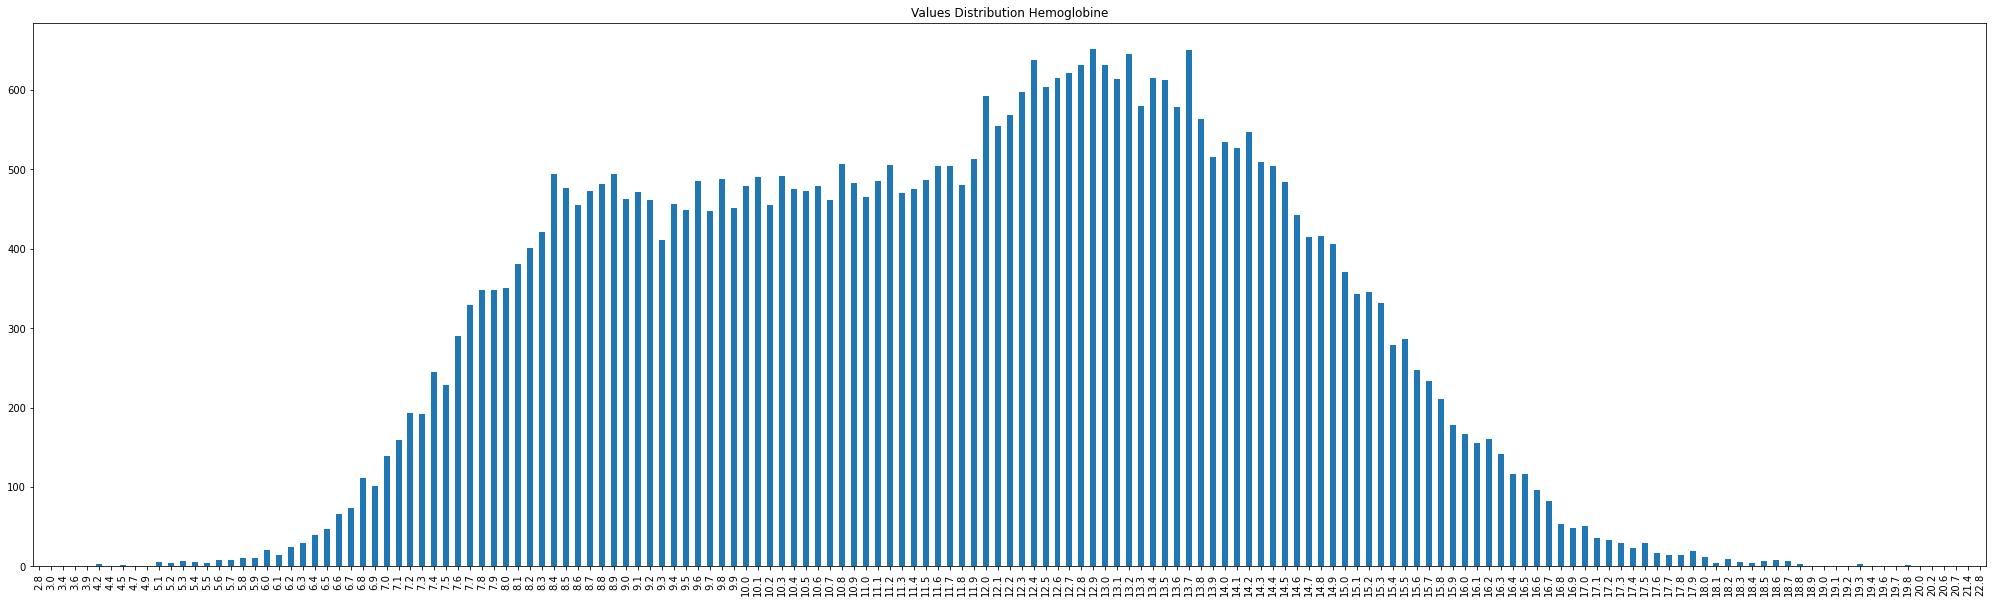

In [93]:
fig = plt.figure(figsize=[35,10])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Hemoglobina']['de_resultado'].value_counts().sort_index(ascending=True)
# print(s.sort_index(ascending=False))
s.plot.bar()
plt.title('Values Distribution Hemoglobine')
plt.show()

In [94]:
ids = an_res_num[ an_res_num['de_analito'].str[:] == 'Hemoglobina'].id_paciente

In [101]:
# sexo_ids = []
# for id_ in ids:
#     sexo = einstein_paciente[einstein_paciente.id_paciente == id_]
#     sexo_ids.append([sexo.ic_sexo, id_])

In [102]:
# sexo_ids_pd = []
# for id_ in sexo_ids:
#     sexo_ids_pd.append(pd.DataFrame(id_))
# sexo_ids_pd = pd.concate(sexo_ids_pd)    

In [ ]:
fig = plt.figure(figsize=[50,10])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Hematócrito']['de_resultado'].value_counts().sort_index(ascending=True)
# print(s.sort_index(ascending=False))
s.plot.bar()
plt.title('Values Distribution Hematócrito')
plt.show()

In [ ]:
fig = plt.figure(figsize=[5,5])
s = an_res_num[ an_res_num['de_analito'].str[:] == 'Plaquetas']['de_resultado'].value_counts().sort_index(ascending=True)
# print(s)
# s.plot.bar()
s.plot.box()
# an_res_num[ an_res_num['de_analito'].str[:] == 'Plaquetas']['de_resultado'].describe()
# plt.title('Values Distribution Hematócrito')
# plt.show()

In [ ]:
# fig = plt.figure(figsize=[50,10])
# s[0:100].plot.bar()

In [31]:
analito_resultado_covid19 = analito_resultado[ analito_resultado['de_analito'].str[:] == 'Resultado COVID-19:']

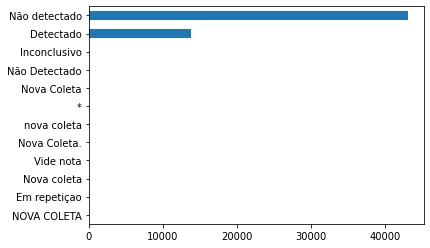

In [32]:
s = analito_resultado_covid19['de_resultado'].value_counts().sort_values(ascending=True)
s.plot.barh()

In [33]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    return text    

round1 = lambda x: clean_text_round1(x)

In [34]:
analito_resultado_covid19['de_resultado'] = analito_resultado_covid19.de_resultado.apply(round1)

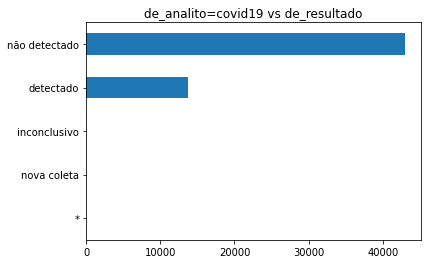

In [35]:
s = analito_resultado_covid19['de_resultado'].value_counts()[0:5].sort_values(ascending=True)
s.plot.barh()
plt.title('de_analito=covid19 vs de_resultado')
plt.show()

In [36]:
einstein_exames['de_resultado'] = einstein_exames.de_resultado.apply(round1)

In [37]:
def my_simple(s):
    otros = 0
    v = s.get_values()
    idx = 0
    for i in s.index:
        if i != 'detectado' and i != 'não detectado':
            otros += v[idx]
        idx += 1

    detectado = 0
    idx = 0
    for i in s.index:
        if i == 'detectado':
            detectado += v[idx]
        idx += 1

    ndetectado = 0
    idx = 0
    for i in s.index:
        if i == 'não detectado':
            ndetectado += v[idx]
        idx += 1
#     print(otros, detectado, ndetectado)
    results = pd.Series(dict( detectado= detectado , nao_detectado= ndetectado, outros=otros))
    return results

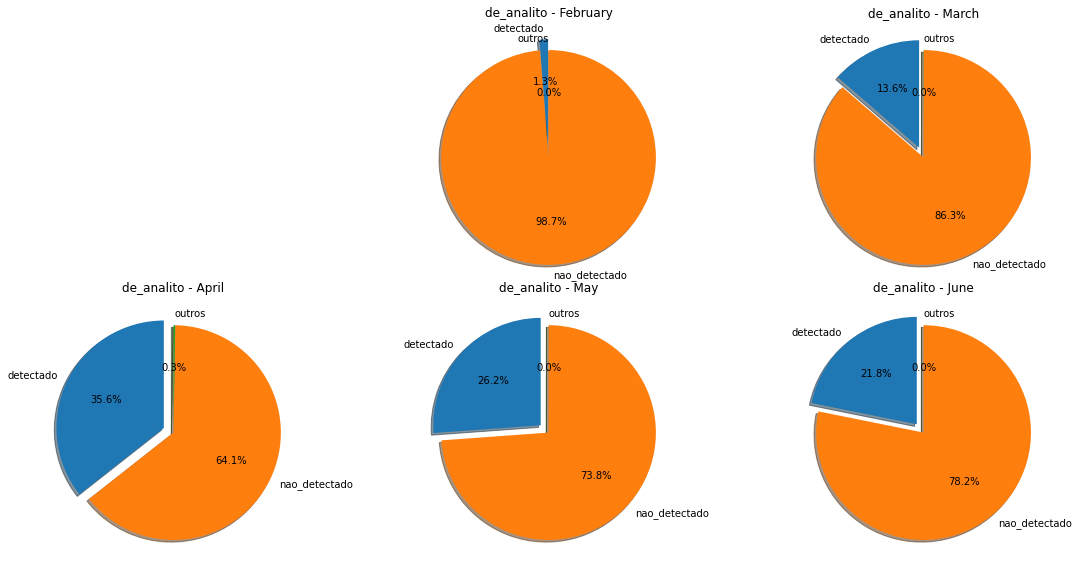

In [38]:
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

fig = plt.figure(figsize=[20,10])
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.025, hspace=0.025)

months = ['January', 'February', 'March', 'April','May', 'June']
total = []
colors = cm.rainbow(np.linspace(0, 1, 6))
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
for i in range(1,len(months)):
    plt.subplot(gs1[i])
    s = einstein_exames[einstein_exames['dt_coleta'].str[3:5] == "0"+str(i+1)]
    s = s[ s['de_analito'].str[:] == 'Resultado COVID-19:' ]['de_resultado'].value_counts().sort_values(ascending=True)
    s = my_simple(s)
    plt.pie(list(s.get_values()), labels=list(s.index), autopct='%1.1f%%',shadow=True, startangle=90, explode=explode)#,colors=colors[0:len(list(s.get_values()))])
    plt.title('de_analito - ' + months[i])
    plt.xticks(rotation=90)

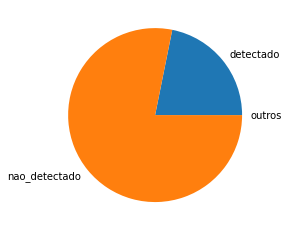

In [39]:
plt.pie(list(s.get_values()), labels=list(s.index))
plt.show()

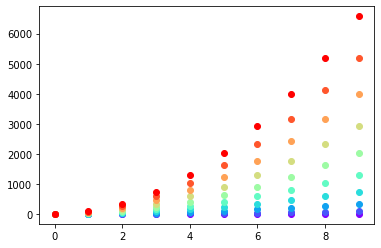

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)

In [41]:
analitos_names.shape

(30,)

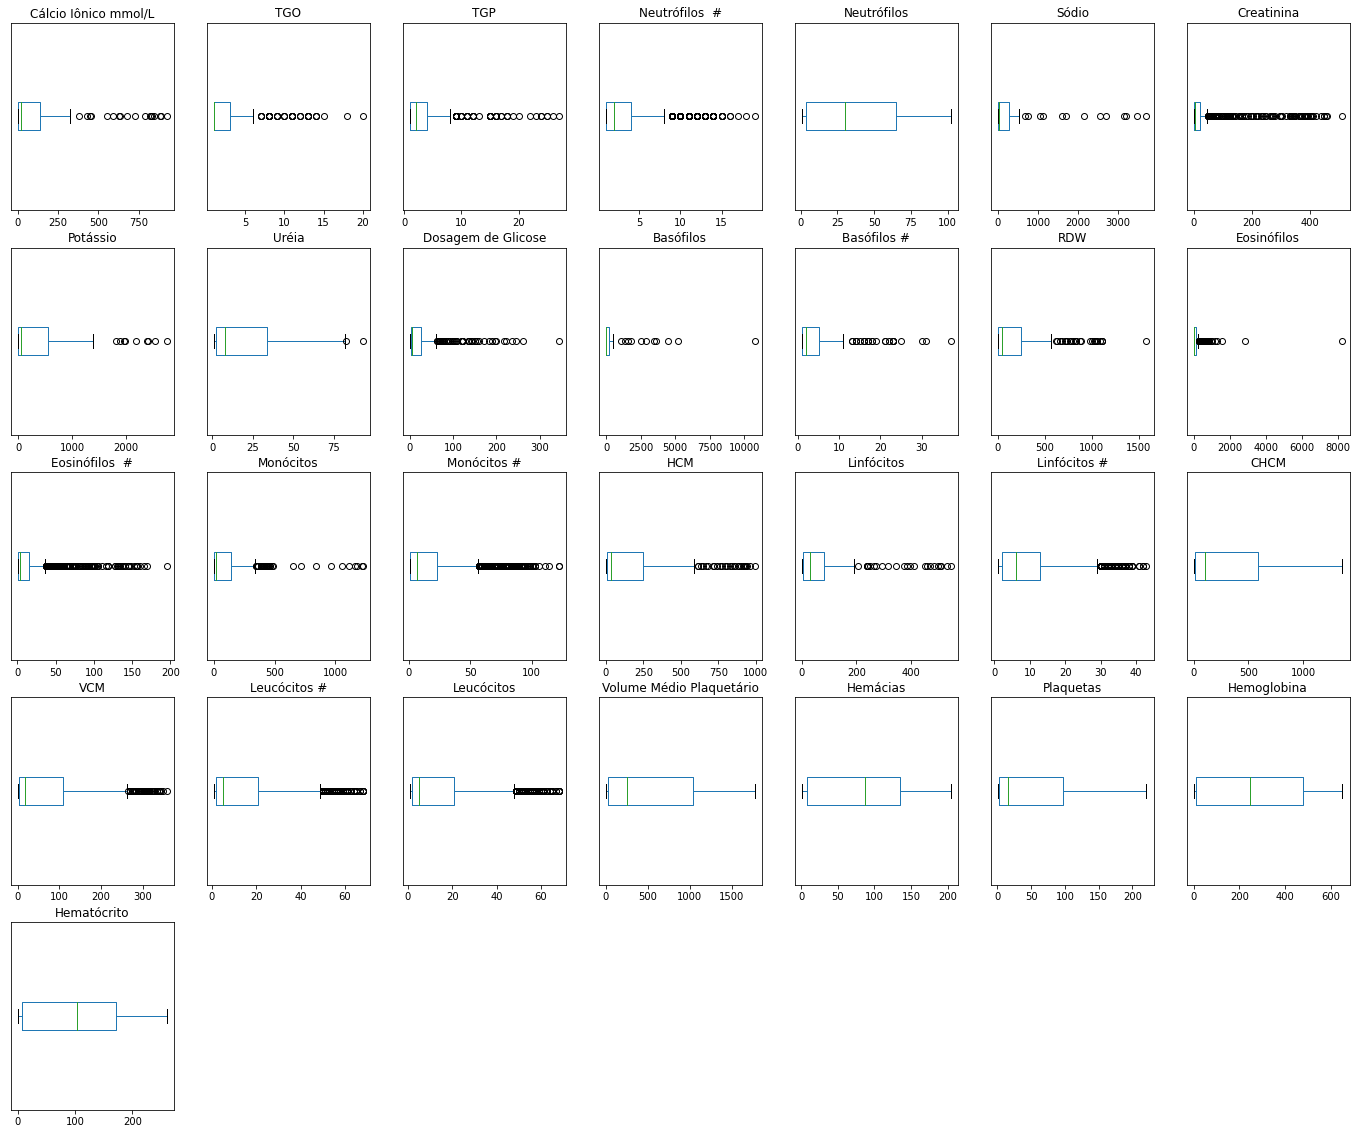

In [42]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s = an_res_num[ an_res_num['de_analito'].str[:] == names]['de_resultado'].value_counts().sort_index(ascending=True)
    if s.shape[0] != 0:
        plt.subplot(5,7,i+1)
        s.plot.box(title=names, vert=0)
        plt.gca().yaxis.set_visible(False)
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [43]:
analito_resultado_covid19

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
13,a5f730467cee875c23609ee2692dc590d362d3b2,20/04/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,detectado,NaN,Não detectado
54,abbade89b215ce96b232bd8026cf410a7c96c362,14/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
61,82845487ef76d23297230e72e48bb5a105059c44,03/04/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
90,c6508c84c4d1791d33e1823ca863c52758d491f0,26/05/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
112,a42dc5219d2655cdcaac9b3e074226c0b51a69a8,16/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
156,da93a8960df87eee264059049f54910bd72d5344,05/05/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,detectado,NaN,Não detectado
171,9b8ff407a2e679cda7e0e89cad45e2bbbb83519d,30/04/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
177,bd0559c61491a28ab9af0d72a063dc10af46254c,10/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
186,eee38005849a65734f08ac7c46bb78cf46fa4577,01/05/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
289,8bea1f97e6afb481dc3e251d70914530520a9dc9,13/05/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado


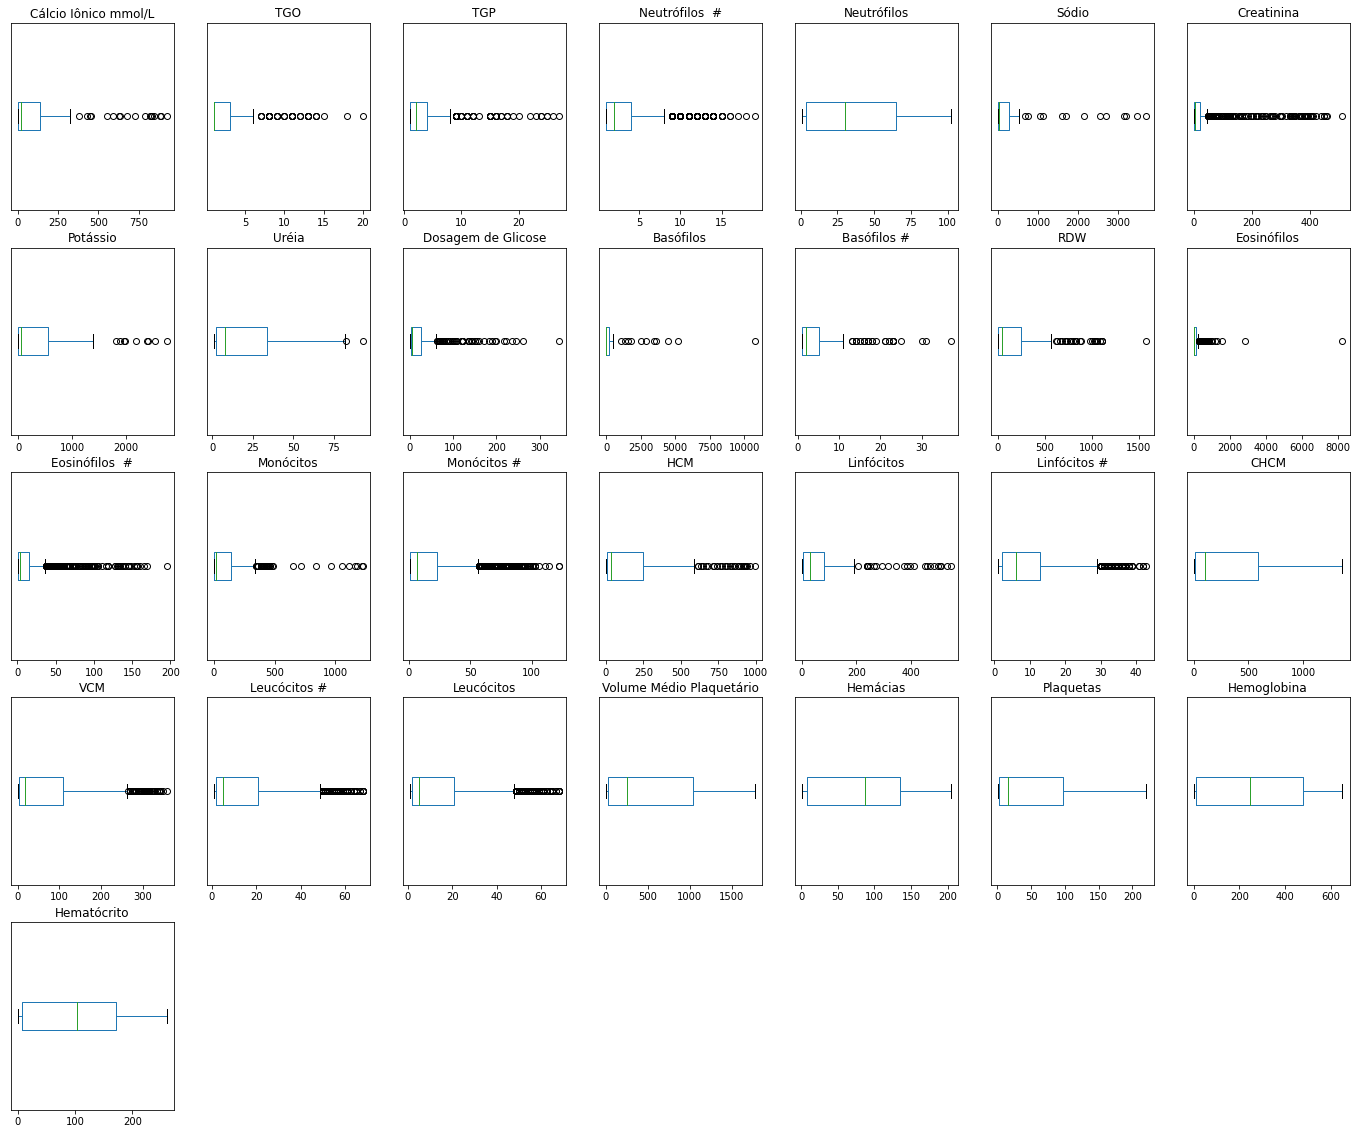

In [44]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s = an_res_num[ an_res_num['de_analito'].str[:] == names]['de_resultado'].value_counts().sort_index(ascending=True)
    if s.shape[0] != 0:
        plt.subplot(5,7,i+1)
        s.plot.box(title=names, vert=0)
        plt.gca().yaxis.set_visible(False)
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [45]:
einstein_exames.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,1853695,1853695,1853695,1853512,1853695,1853695,1502471,1454886
unique,43561,176,1,61,127,24794,18,298
top,824c0a550406da44fe093b3ac0fe7ee3cf57d41f,29/05/2020,HOSP,Hemograma com Plaquetas,Resultado COVID-19:,não detectado,%,Não detectado
freq,6874,22650,1853695,453929,56843,121859,370851,131424


In [46]:
analito_resultado_covid19.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,56843,56843,56843,56843,56843,56843,0.0,56796
unique,43398,125,1,1,1,8,0.0,1
top,dbd2f185e389e4b5d8bbcf18b3a75f1e2593bb37,13/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
freq,17,1436,56843,56843,56843,43011,NaN,56796


In [47]:
covid19_negativo = analito_resultado_covid19[ analito_resultado_covid19['de_resultado'].str[:] == 'não detectado' ]

In [48]:
covid19_negativo.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,43011,43011,43011,43011,43011,43011,0.0,42993
unique,37037,124,1,1,1,1,0.0,1
top,ad5ac28d6ced83159649a91bc6a7fd4df7b737d0,13/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
freq,10,1349,43011,43011,43011,43011,NaN,42993


In [49]:
covid19_positivo = analito_resultado_covid19[ analito_resultado_covid19['de_resultado'].str[:] == 'detectado' ]

In [50]:
covid19_positivo.describe()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
count,13798,13798,13798,13798,13798,13798,0.0,13776
unique,9498,117,1,1,1,1,0.0,1
top,87a9821aabe111b7bd8aaae374491df0460ad43f,28/05/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,detectado,NaN,Não detectado
freq,13,349,13798,13798,13798,13798,NaN,13776


In [51]:
ids_negativo = covid19_negativo['id_paciente'].unique()
ids_positivo = covid19_positivo['id_paciente'].unique()

In [52]:
einstein_exames = einstein_exames.sort_values(['id_paciente'])

In [53]:
pacientes_negativo = []
for ids in ids_negativo:
    data_negativo = einstein_exames[ einstein_exames['id_paciente'].str[:] == str(ids) ]
    pacientes_negativo.append(data_negativo)

In [54]:
total_pacientes_negativo = pd.concat( pacientes_negativo )

In [55]:
total_pacientes_negativo

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
54,abbade89b215ce96b232bd8026cf410a7c96c362,14/03/2020,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NaN,Não detectado
1012416,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Dosagem de Albumina,Albumina,3.94,g/dL,3.50 a 5.20
544474,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Hemograma com Plaquetas,Leucócitos #,6540,µL,3500 a 10500
1004142,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Dosagem de Uréia,Uréia,23,mg/dL,17 a 49
544475,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Hemograma Contagem Auto,Linfócitos,33.0,%,NaN
741222,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Dosagem de Cálcio Iônico,Cálcio Iônico mmol/L,1.21,mmol/L,1.14 a 1.31
68886,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Hemograma Contagem Auto,Monócitos,6.1,%,NaN
544476,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Hemograma com Plaquetas,Hematócrito,41.1,%,35.0 a 45.0
68887,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Hemograma com Plaquetas,VCM,95.1,fL,82.0 a 98.0
243001,82845487ef76d23297230e72e48bb5a105059c44,10/02/2020,HOSP,Dosagem de Glicose,Dosagem de Glicose,,NaN,NaN


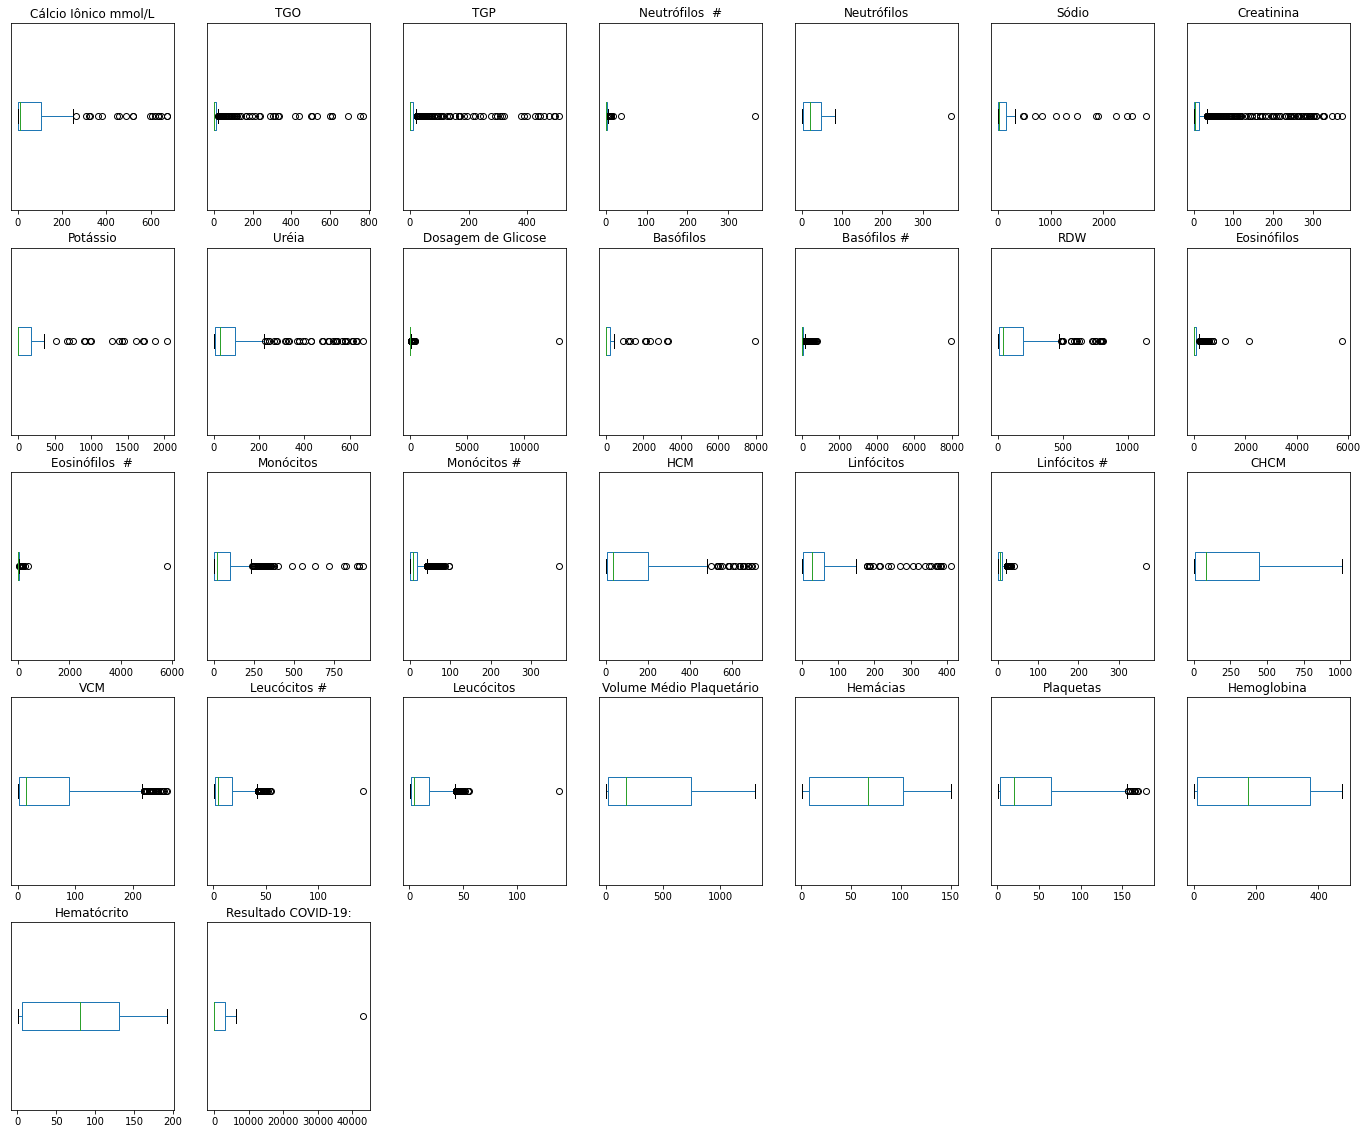

In [56]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s = total_pacientes_negativo[ total_pacientes_negativo['de_analito'].str[:] == names]['de_resultado'].value_counts().sort_index(ascending=True)
    if s.shape[0] != 0:
        plt.subplot(5,7,i+1)
        s.plot.box(title=names, vert=0)
        plt.gca().yaxis.set_visible(False)
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [57]:
pacientes_positivo = []
for ids in ids_positivo:
    data_positivo = einstein_exames[ einstein_exames['id_paciente'].str[:] == str(ids) ]
    pacientes_positivo.append(data_positivo)

In [58]:
total_pacientes_positivo = pd.concat( pacientes_positivo )

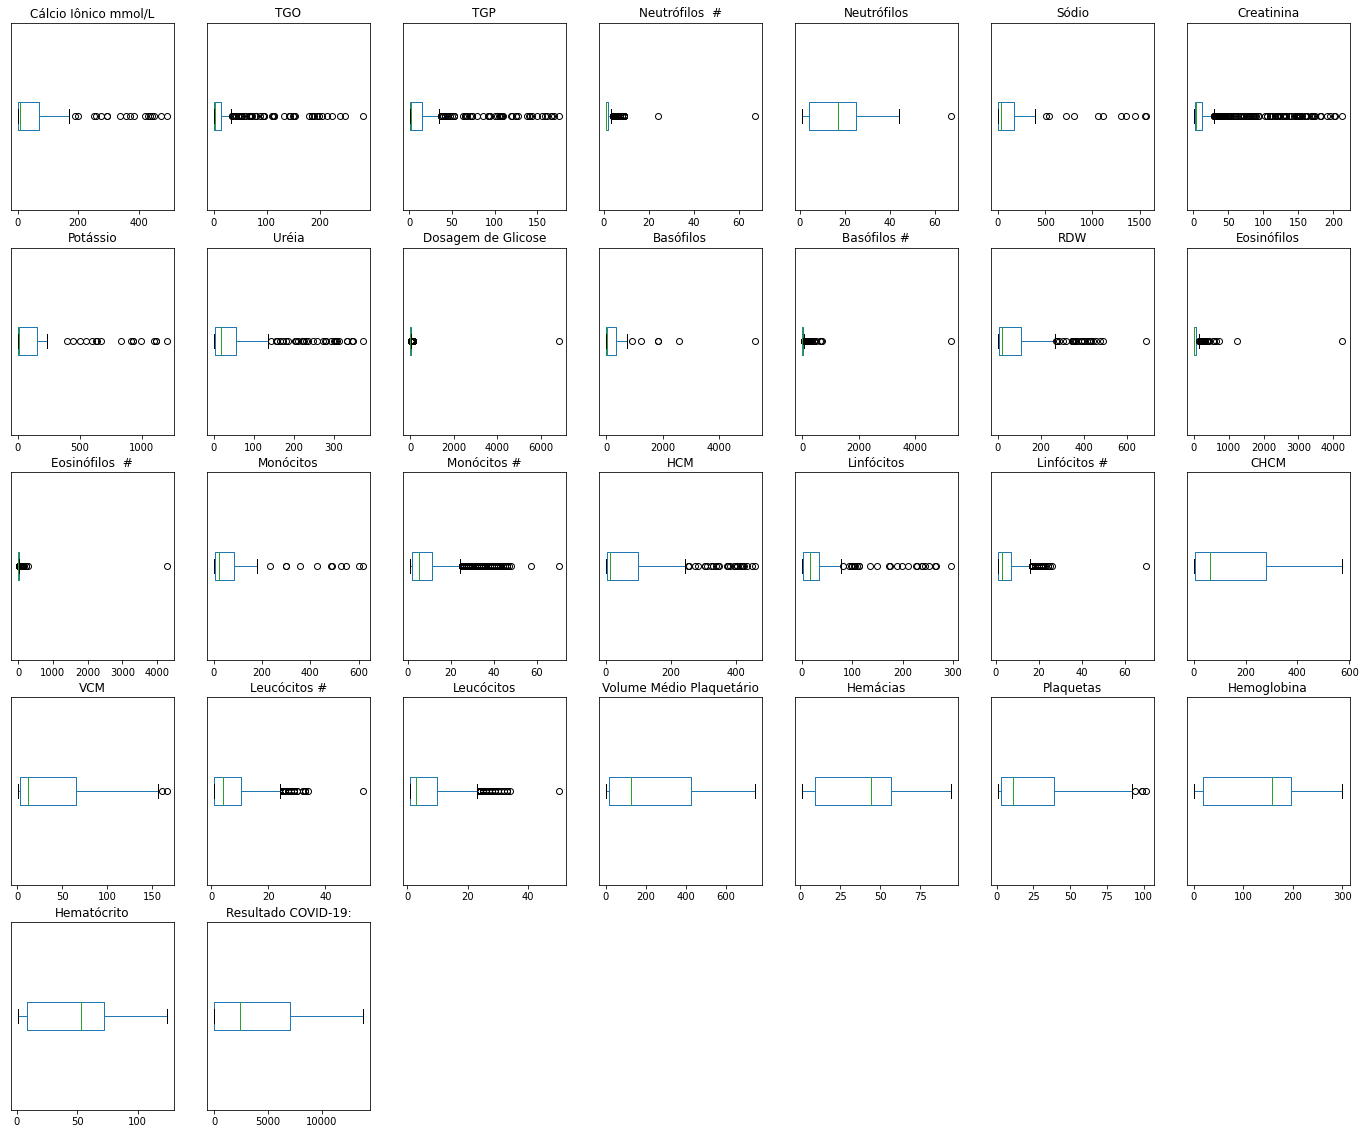

In [59]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s = total_pacientes_positivo[ total_pacientes_positivo['de_analito'].str[:] == names]['de_resultado'].value_counts().sort_index(ascending=True)
    if s.shape[0] != 0:
        plt.subplot(5,7,i+1)
        s.plot.box(title=names, vert=0)
        plt.gca().yaxis.set_visible(False)
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

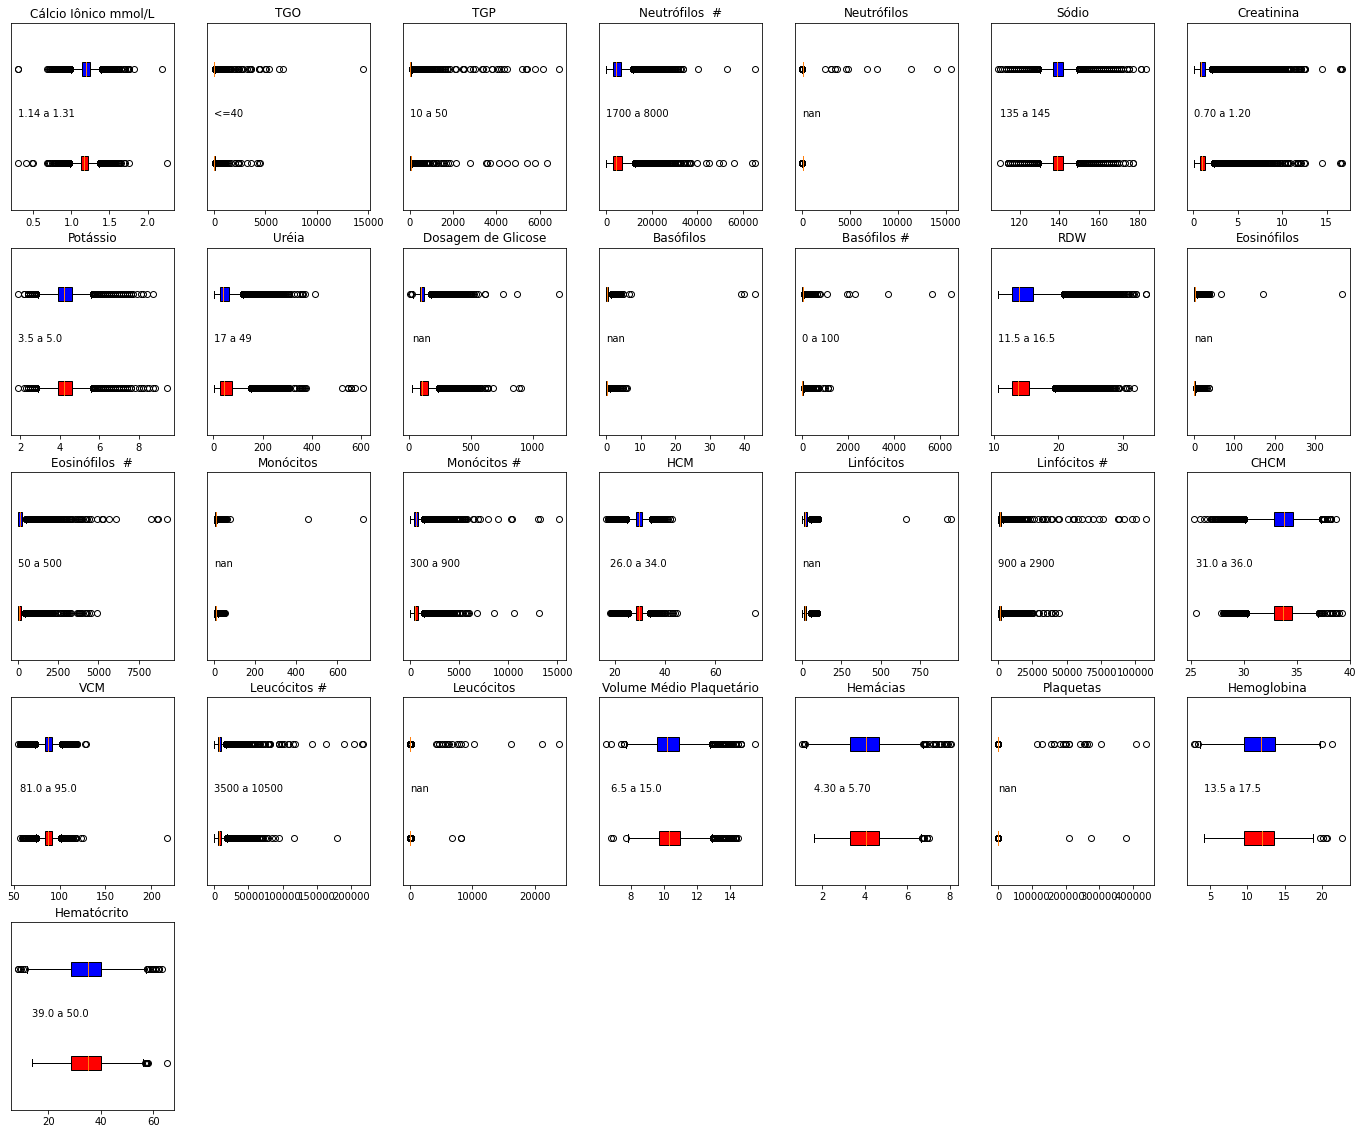

In [188]:
plt.figure(figsize=[24,20])
i = 0
for names in analitos_names:
    s1 = total_pacientes_positivo[ total_pacientes_positivo['de_analito'].str[:] == names]['de_resultado']
    s2 = total_pacientes_negativo[ total_pacientes_negativo['de_analito'].str[:] == names]['de_resultado']
    
    s1 = pd.to_numeric(s1,errors='coerce')
    s1 = s1.get_values()
    s1 = s1.astype('float')
    s1 = s1[np.logical_not(np.isnan(s1))]
    
    s2 = pd.to_numeric(s2,errors='coerce')
    s2 = s2.get_values()
    s2 = s2.astype('float')
    s2 = s2[np.logical_not(np.isnan(s2))]
    
    if s.shape[0] != 0 and names != 'Resultado COVID-19:':
        plt.subplot(5,7,i+1)
#         s1.plot.box(title=names, vert=0)
#         s2.plot.box(title=names, vert=0)
        values = [s1, s2]
        bplot = plt.boxplot(values, vert=0, patch_artist=True )
        
        # fill with colors
        colors = ['red', 'blue']
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        
        plt.title(names)
        plt.text(np.min(s1),1.5,total_pacientes_positivo[ total_pacientes_positivo['de_analito'].str[:] == names]['de_valor_referencia'].iloc[0])
        plt.gca().yaxis.set_visible(False)
#         plt.legend()
#         plt.axis(False)
#     else:
#         plt.title('vacio')
        i += 1
plt.show()

In [87]:
total_pacientes_positivo.to_csv('covid19_positivo.csv', sep ="|", encoding='utf-8')
total_pacientes_negativo.to_csv('covid19_negativo.csv', sep ="|", encoding='utf-8')

In [106]:
total_pacientes_negativo_ = pd.DataFrame.copy(total_pacientes_negativo)

In [112]:
total_pacientes_negativo_['dt_coleta'] = pd.to_datetime(total_pacientes_negativo_['dt_coleta'], format="%d/%m/%Y")

In [113]:
multi = total_pacientes_negativo_.set_index(['id_paciente','dt_coleta']).sort_index()

In [114]:
multi

de_origem  \
id_paciente                              dt_coleta              
00012e05d80f5884023c3b6eaa3294e41d7c58bc 2020-03-25      HOSP   
0001a3bacb771dfa63c6404725e9f98bf94b19ed 2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
                                         2020-02-04      HOSP   
...                                                       ...   
fffe5deaaa04df733d7453bfaff1d55b8a397575 2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-04-29      HOSP   
                                         2020-04-29      HOSP   
                      

In [115]:
multi.to_csv('negativo.csv', sep ="|", encoding='utf-8')

In [116]:
total_pacientes_positivo_ = pd.DataFrame.copy(total_pacientes_positivo)
total_pacientes_positivo_['dt_coleta'] = pd.to_datetime(total_pacientes_positivo_['dt_coleta'], format="%d/%m/%Y")
multi = total_pacientes_positivo_.set_index(['id_paciente','dt_coleta']).sort_index()
multi.to_csv('positivo.csv', sep ="|", encoding='utf-8')

In [117]:
einstein_exames.head()

,id_paciente,dt_coleta,de_origem,de_exame,de_analito,de_resultado,cd_unidade,de_valor_referencia
1096608,00006490d57666d73747c29c01079b60b1353002,07/06/2020,HOSP,Hemograma com Plaquetas,Plaquetas,660,x10^3/uL,NaN
1082707,00006490d57666d73747c29c01079b60b1353002,24/05/2020,HOSP,Gasometria Arterial,CO2 Total (gasometria arterial),22.9,mmol/L,23.0 a 27.0
254144,00006490d57666d73747c29c01079b60b1353002,24/05/2020,HOSP,Hemograma com Plaquetas,Leucócitos #,9800,µL,3500 a 10500
1605980,00006490d57666d73747c29c01079b60b1353002,24/05/2020,HOSP,Hemograma com Plaquetas,VCM,81.9,fL,82.0 a 98.0
254145,00006490d57666d73747c29c01079b60b1353002,04/06/2020,HOSP,Hemograma Contagem Auto,Linfócitos,33.2,%,NaN


In [189]:
s2 = total_pacientes_negativo[ total_pacientes_negativo['de_analito'].str[:] == 'TGO']['de_resultado']

In [190]:
s2 = pd.to_numeric(s2,errors='coerce')

In [191]:
s2 = pd.to_numeric(s2,errors='coerce')
s2 = s2.get_values()
s2 = s2.astype('float')
s2 = s2[np.logical_not(np.isnan(s2))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5d9860190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5d97f3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5e6eda810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5d9933950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5d9857c90>],
 'means': []}

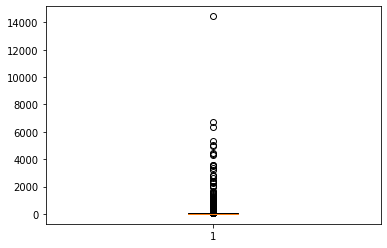

In [192]:
plt.boxplot(s2)

In [196]:
s2 = np.sort(s2)

In [198]:
s2[::-1][0]

14446.0